In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [353]:
houses = pd.read_csv('/Users/mohannatd/Programming/Codes/PythonJadi/final/houses.csv', index_col=False)

# get insight

In [354]:
houses.head()

,Unnamed: 0,id,area,space,equipment,type,room,city,state,price,capacity,extra
0,0,39,600,300,12,ویلایی,3,نمک آبرود,مازندران,500000,8,7
1,1,52,312,75,9,ویلایی,1,طالقان,البرز,250000,4,2
2,2,79,114,85,10,آپارتمان,1,کاشان,اصفهان,100000,4,6
3,3,87,400,200,12,ویلایی,3,نمک آبرود,مازندران,1000000,6,6
4,4,101,500,120,8,آپارتمان,2,نمک آبرود,مازندران,250000,5,0


In [355]:
houses.drop(['Unnamed: 0'], axis=1, inplace=True)

In [356]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4785 non-null   int64 
 1   area       4785 non-null   int64 
 2   space      4785 non-null   int64 
 3   equipment  4785 non-null   int64 
 4   type       4785 non-null   object
 5   room       4785 non-null   int64 
 6   city       4785 non-null   object
 7   state      4785 non-null   object
 8   price      4785 non-null   int64 
 9   capacity   4785 non-null   int64 
 10  extra      4785 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 411.3+ KB


In [357]:
houses.describe()

,id,area,space,equipment,room,price,capacity,extra
count,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4.785000e+03,4785.000000,4785.000000
mean,28950.464159,2094.212539,117.513480,8.256635,1.123302,3.457045e+05,3.523093,3.588715
std,12101.208762,18788.321700,220.447082,2.169878,1.115531,4.469819e+05,2.288170,4.298892
min,39.000000,1.000000,4.000000,0.000000,0.000000,2.500000e+04,1.000000,0.000000
25%,20846.000000,220.000000,24.000000,7.000000,0.000000,1.000000e+05,2.000000,1.000000
50%,32008.000000,500.000000,75.000000,8.000000,1.000000,2.200000e+05,4.000000,3.000000
75%,37832.000000,1000.000000,120.000000,10.000000,2.000000,4.000000e+05,5.000000,4.000000
max,48034.000000,570000.000000,4000.000000,14.000000,11.000000,7.500000e+06,45.000000,84.000000


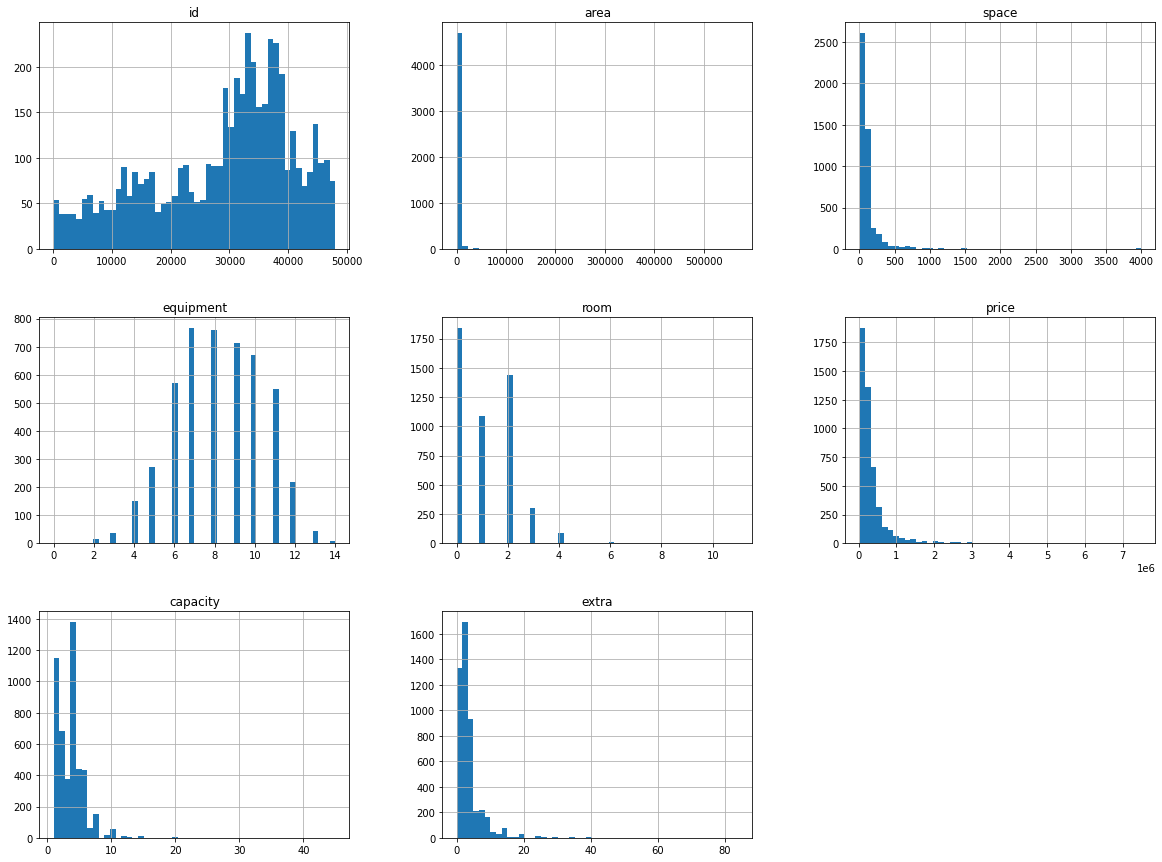

In [358]:
%matplotlib inline
houses.hist(bins=50, figsize=(20,15))
plt.show()

# Split train and test

In [359]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(houses, test_size=0.2, random_state=42)

In [360]:
houses = train_set.copy()

In [361]:
houses.corr()['price'].sort_values()

id          -0.057865
extra       -0.049933
area        -0.011502
space        0.187854
capacity     0.416145
equipment    0.486323
room         0.525764
price        1.000000
Name: price, dtype: float64

# Embed Feature

make new featur that is sum of main capacity and extra capacity of each houses.👇

In [362]:
houses['full_capacity'] = houses['capacity']+houses['extra']

In [363]:
houses.corr()['price'].sort_values()

id              -0.057865
extra           -0.049933
area            -0.011502
full_capacity    0.157391
space            0.187854
capacity         0.416145
equipment        0.486323
room             0.525764
price            1.000000
Name: price, dtype: float64

capacity per room👇

In [364]:
houses['capacityPerRoom'] = houses['capacity']/houses['room']

In [365]:
houses.corr()['price'].sort_values()

capacityPerRoom   -0.091760
id                -0.057865
extra             -0.049933
area              -0.011502
full_capacity      0.157391
space              0.187854
capacity           0.416145
equipment          0.486323
room               0.525764
price              1.000000
Name: price, dtype: float64

# Preproccessing

In [366]:
x = houses.drop(['id', 'extra', 'area', 'capacityPerRoom', 'full_capacity', 'price', 'space'], axis=1)
y = houses['price']

In [367]:
x.sample(10)

,equipment,type,room,city,state,capacity
2449,11,بوم‌گردی,0,فردوس,خراسان جنوبی,1
3223,7,بوم‌گردی,0,نطنز,اصفهان,5
2055,5,بوم‌گردی,0,جیرفت,کرمان,1
2435,10,ویلایی,2,سامان,چهارمحال و بختیاری,15
4592,7,بوم‌گردی,0,نطنز,اصفهان,2
4123,9,بوم‌گردی,0,رضوان شهر,گیلان,5
4732,8,ویلایی,1,اصفهان,اصفهان,3
2613,4,سوئیت,0,بندرعباس,هرمزگان,3
4524,10,ویلایی,2,رامسر,مازندران,4
363,13,ویلایی,2,مشهد,خراسان رضوی,6


In [368]:
print(len(x['state'].value_counts()))
print(len(x['city'].value_counts()))

31
255


In [369]:
x.drop(['city'], axis=1, inplace=True)

In [371]:
enc = OneHotEncoder()
houses_prepared = enc.fit_transform(x[['type', 'state']]).toarray()
c = enc.get_feature_names(['type', 'state'])

houses_prepared = preprocessor.fit_transform(x)
houses_prepared = pd.DataFrame(houses_prepared.toarray(), index=x.index, columns=c)

In [372]:
draft = houses_prepared.copy()
draft['price'] = y
draft['equipment'] = x['equipment']
draft['room'] = x['room']
draft['capacity'] = x['capacity']

In [373]:
draft.corr()['price'].sort_values()

type_بوم‌گردی               -0.345005
state_خراسان رضوی           -0.109303
state_سمنان                 -0.091780
type_سوئیت                  -0.091451
state_خراسان جنوبی          -0.088857
state_اصفهان                -0.088093
state_یزد                   -0.083498
state_کرمان                 -0.082347
state_گلستان                -0.056883
state_فارس                  -0.055467
state_خراسان شمالی          -0.055297
state_همدان                 -0.052407
state_کردستان               -0.048927
state_سیستان و بلوچستان     -0.045071
state_قم                    -0.039545
state_بوشهر                 -0.035655
state_چهارمحال و بختیاری    -0.034716
state_لرستان                -0.032505
state_آذربایجان غربی        -0.031620
state_مرکزی                 -0.030506
state_زنجان                 -0.030349
state_خوزستان               -0.029952
state_کرمانشاه              -0.025306
state_قزوین                 -0.024575
state_کهکیلویه و بویراحمد   -0.023579
state_آذربایجان شرقی        -0.021290
state_اردبیل

In [376]:
x = draft[['capacity', 'equipment', 'room', 'type_ویلایی', 'type_بوم\u200cگردی', 'state_تهران', 'state_مازندران']]

# Select Model

## RandomForest

In [377]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as MAE

rnd_forest = RandomForestRegressor(random_state=42)
rnd_forest.fit(x, y)
print(MAE(y, rnd_forest.predict(x)))
print()

first_cv_scores = cross_val_score(rnd_forest, x, y, cv=10, scoring='neg_mean_absolute_error')
print(-first_cv_scores.mean())
print(first_cv_scores.std())

113004.40976257615

147647.36623372257
12170.664460863592


## LinearRegression

In [378]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x, y)
print(MAE(y, linear.predict(x)))
print()

first_cv_scores = cross_val_score(linear, x, y, cv=10, scoring='neg_mean_absolute_error')
print(-first_cv_scores.mean())
print(first_cv_scores.std())

195946.12733726678

196634.2281341948
9664.930635538536


# Fine-tune

## RandomizedSearchCV

In [379]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rnd_search = RandomizedSearchCV(rnd_forest, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42);
rnd_search.fit(x, y);

### Results

In [384]:
cvres = rnd_search.cv_results_
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
    
print()
max(cvres["mean_test_score"])

-147566.75104585398 {'max_features': 7, 'n_estimators': 180}
-147802.64176775265 {'max_features': 5, 'n_estimators': 15}
-146031.44607023807 {'max_features': 3, 'n_estimators': 72}
-147410.16964049713 {'max_features': 5, 'n_estimators': 21}
-147467.39865307458 {'max_features': 7, 'n_estimators': 122}
-146135.38016167493 {'max_features': 3, 'n_estimators': 75}
-145826.16436790166 {'max_features': 3, 'n_estimators': 88}
-146543.88376535175 {'max_features': 5, 'n_estimators': 100}
-145565.6238882294 {'max_features': 3, 'n_estimators': 150}
-156920.54656540713 {'max_features': 5, 'n_estimators': 2}



-145565.6238882294

### feature importances

In [385]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.21177748, 0.33754381, 0.29979324, 0.04996824, 0.01816975,
       0.05211377, 0.03063372])

In [386]:
sorted(zip(feature_importances, ['capacity', 'equipment', 'room', 'type_ویلایی', 'type_بوم\u200cگردی', 'state_تهران', 'state_مازندران']))

[(0.018169747051694662, 'type_بوم\u200cگردی'),
 (0.030633716769660025, 'state_مازندران'),
 (0.04996823779179056, 'type_ویلایی'),
 (0.0521137681203127, 'state_تهران'),
 (0.21177747844780237, 'capacity'),
 (0.2997932432692985, 'room'),
 (0.33754380854944127, 'equipment')]

# Predict Test

In [387]:
test = test_set.copy()

In [388]:
test.drop(['id', 'extra', 'area', 'price', 'space', 'city'], axis=1, inplace=True)

In [389]:
enc = OneHotEncoder()
d = enc.fit_transform(test[['type','state']]).toarray()
c = enc.get_feature_names(['type', 'state'])
draft = pd.DataFrame(d, index=test.index, columns=c)

In [391]:
test.drop(['type', 'state'], axis=1, inplace=True)
test['type_بوم\u200cگردی'] = draft['type_بوم\u200cگردی']
test['type_ویلایی'] = draft['type_ویلایی']
test['state_تهران'] = draft['state_تهران']
test['state_مازندران'] = draft['state_مازندران']
test.sample(5)

,equipment,room,capacity,type_بوم‌گردی,type_ویلایی,state_تهران,state_مازندران
376,13,2,4,0.0,1.0,0.0,1.0
17,11,2,3,0.0,0.0,0.0,0.0
29,11,4,8,0.0,1.0,0.0,0.0
807,6,1,1,1.0,0.0,0.0,0.0
3751,10,1,2,0.0,0.0,0.0,0.0


### Final Score

In [396]:
print(MAE(test_set['price'], rnd_forest.predict(test)))

289049.15649516514
